<a href='#1'>  Изучение данных и подготовка к анализу</a>

<a href='#2'> Анализ данных </a>

<a href='#2.1'>  Cоотношение видов объектов общественного питания по количеству </a>

<a href='#2.2'> Cоотношение сетевых и несетевых заведений по количеству </a>

<a href='#2.3'> Для какого вида объекта общественного питания характерно сетевое распространение </a>

<a href='#2.4'>  Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? </a>

<a href='#2.5'>  Среднее количество посадочных мест </a>

<a href='#2.6'> Топ-10 улиц по количеству объектов общественного питания </a>

<a href='#2.7'> Число улиц с одним объектом общественного питания </a>

<a href='#2.8'> Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания </a>

<a href='#3'> Вывод </a>

<a href='#4'> Презентация </a>

# Исследование рынка заведений общественного питания 

Прежде чем инвестировать в проект кафе, с роботами в качестве официантов, инвесторов интересует текущее положение дел на рынке — сможет ли заведение быть популярным долгое время, когда все насмотрятся на роботов-официантов? 
Задача: подготовить исследование рынка на основании открытых данных о заведениях общественного питания в Москве.

Описание данных

Таблица **rest_data**:

* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np

<a id='1'></a>

## Изучение данных и подготовка к анализу

In [2]:
rest_data = pd.read_csv(path+'rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропусков в данных нет. При рассмотрении первых строк таблицы видно, что в названиях используются буквы разного региста. ПРиведем все в нижний регистр.

In [4]:
 rest_data['object_name'] =  rest_data.object_name.str.lower()

In [5]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Кроме того видно, что в графе названия написан также тип объекта. Для объектов, относящихся к сетевым, такое написание будет принято как другое название, и заведение не будет отнесено к сети, к которой относится. 

In [6]:
# выделим уникальные названия типов объектов
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [7]:
 # уберем типы объектов из названий объектов
words = ['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)','кофейня','кальянная','кондитерская','пиццерия','пбо'] 
for word in words: 
    rest_data['object_name'] = rest_data['object_name'].str.replace(word,'')



Проверим сетевые заведения на дубликаты в названиях объектов. Проверим по некоторым самым популярный сетям (буквы: б,д,к,м,с,b,k,m,s).

In [8]:
def checing (data, check):
    for value in check:
        result= [idx for idx in data if idx.lower().startswith(value.lower())]
        print(value, result)
        print()
    return 

In [9]:
# выделим в отдельный список названия сетевых объектов
chain_name = rest_data.loc[rest_data['chain'] == "да"]['object_name'].unique().tolist()
check = ['б','д','к','м','с','b','k','m','s']
checing (chain_name, check)

б ['брусника', 'бургер кинг', 'бабай клаб', 'ботик петра', 'баскин роббинс', 'брава коста кофе', 'билла', 'бутчер бизон', 'бургер кинг burger king', 'бир хаус', 'брудер', 'бакинский бульвар', 'бекю', 'братья караваевы', 'бургер клаб', 'блинная', 'бир хаус паб', 'братья караваевых', 'бистро пронто', 'бенто wok', 'бодрый день кофе с собой', 'бб энд бургерс в&в бургер']

д ["домино'с пицца", 'данкин донатс', 'джаганнат', 'додо пицца', 'две палочки', 'джон джоли', 'де марко', 'домашнее  сеть городских ', 'добрынинский и партнёры', 'дабл би', 'детское  «андерсон»', 'детский клуб «андерсон»', 'да пино', 'да пино (da pino)', 'дюшес', 'детское  «космик»', 'дорогая я перезвоню', 'дабл би блэк', "домино'с пицца domino,s pizza"]

к ['кружка', 'кофе хаус', 'кулинарная лавка братьев караваевых братья караваевы', 'кофе с собой', 'крошка картошка', 'кофемания', 'кофе хаус. экспрессо и капучино ', 'кактус', 'кофе-бин', 'кофепорт', 'кофе-хаус', 'корчма «тарас бульба»', 'корчма тарас бульба', 'колбасофф

Заменим найденные дубликаты в названиях.

In [10]:
synonym = {'макдоналдс':'москва - макдоналдс',
          "домино'с пицца":"домино'с пицца domino,s pizza",
          'бургер кинг':'бургер кинг burger king',
          'kfc':'kfc волгоградский',
          'мята lounge':['мята lounge шаболовка','мята lounge автозаводская','мята lounge октябрьская','кальянная «мята lounge»','кальян-  «мята lounge»', 'кальян- «мята lounge»'],
          'милти':'магазин готовой еды «милти»',
          'кофе-хаус':['кофе хаус. экспрессо и капучино ', 'кофе хаус,экспресс'],
          'coffeeshop':['кофешоп coffeeshop company', 'coffeeshop company'],
          'starbucks': ['кофемания starbucks','starbucks кофе','starbucks, старбакс кофе','starbucks старбакс','starbucks coffee','старбакс starbucks','старбакс','старбакс кофе'],
          'суши wok': ['суши вок','сеть магазинов «суши wok»'],
          'subway':['сабвей','сабвей subway']}
def check_synonym(cell):
    for name, syn in synonym.items():
        if cell in syn:return name
    return cell
rest_data['object_name'] = rest_data['object_name'].apply(check_synonym)


Данные обработаны, теперь можно приступить к анализу данных.

<a id='2'></a>

## Анализ данных

<a id='2.1'></a>

### Cоотношение видов объектов общественного питания по количеству.

In [11]:
pivot = rest_data.groupby('object_type').agg({'id':'count'})\
                 .sort_values(by = 'id',ascending = False).rename(columns = {'id':'total'})
pivot

,total
object_type,
кафе,6099
столовая,2587
ресторан,2285
предприятие быстрого обслуживания,1923
бар,856
буфет,585
кафетерий,398
закусочная,360
магазин (отдел кулинарии),273


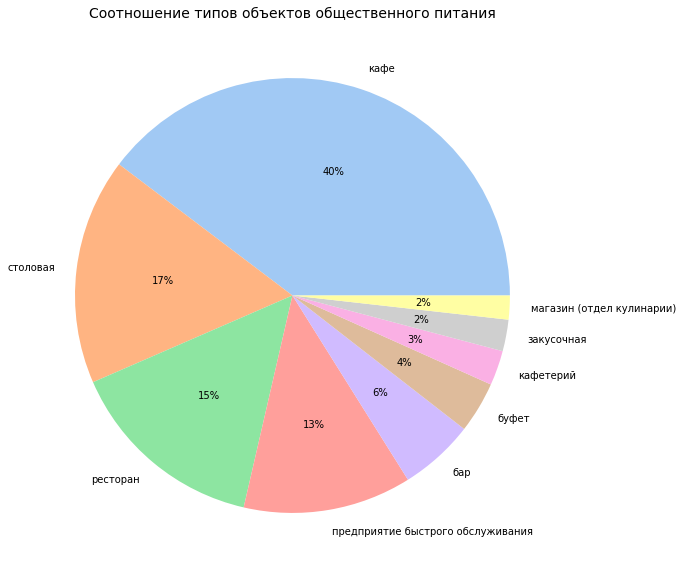

In [12]:
labels = ['кафе', 'столовая','ресторан', 'предприятие быстрого обслуживания','бар','буфет','кафетерий',
        'закусочная', 'магазин (отдел кулинарии)']
plt.figure(figsize = (10,10))
fig  = sns.set_palette('pastel')
plt.pie(pivot['total'], labels=labels,autopct = '%0.0f%%')
plt.title('Cоотношение типов объектов общественного питания',fontsize=14)
plt.show()

<a id='2.2'></a>

Видно, что среди типов объектов общественного питанию преобладают кафе, причем более чем в 2 раза превышает количество объектов других типов, находящихся в топ-3. Столовая и ресторан на 2 и 3 месте соответсвенно. Также близки к ним по количеству предприятия быстрого обслуживания, объектов других типов значительно меньше - суммарно около 17% от всех типов объектов.

### Cоотношение сетевых и несетевых заведений по количеству 

In [13]:
by_chain = rest_data.pivot_table(index = 'chain', values = 'id', aggfunc = 'count').rename(columns = {'id':'total'})
by_chain

,total
chain,
да,2968
нет,12398


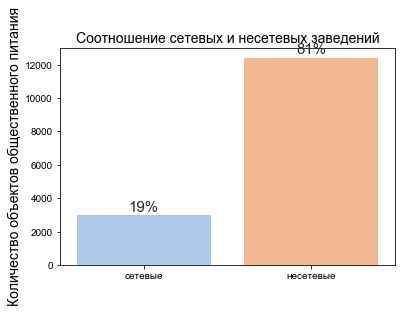

In [14]:
chain = ['сетевые','несетевые']
plot = sns.barplot(x = chain, y='total', data = by_chain)
sns.set(rc={'figure.figsize':(8, 8)})
fig  = sns.set_palette('pastel')
plot.axes.set_title('Соотношение сетевых и несетевых заведений', fontsize=14)
plot.set_ylabel("Количество объектов общественного питания", fontsize=14)
for bar in plot.patches:
    plot.annotate(format(bar.get_height()/15336, '.0%'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


Преобладают несетевые заведения общественного питания, более чем в 4 раза.

<a id='2.3'></a>

### Для какого вида объекта общественного питания характерно сетевое распространение

In [15]:
rest_data.query('chain == "да"').groupby('object_type').agg({'id':'count'})\
                                .sort_values(by = 'id',ascending = False).rename(columns = {'id':'total'})


,total
object_type,
кафе,1396
предприятие быстрого обслуживания,791
ресторан,544
магазин (отдел кулинарии),78
закусочная,56
кафетерий,52
бар,37
буфет,11
столовая,3


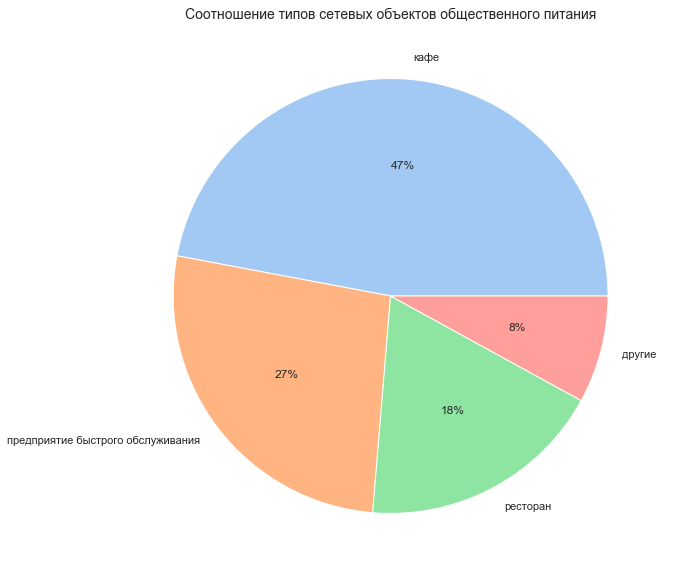

In [16]:
labels = ['кафе', 'предприятие быстрого обслуживания','ресторан','другие']
total = [1396, 791, 544, 237]
plt.figure(figsize = (10,10))
fig  = sns.set_palette('pastel')
plt.pie(total, labels=labels,autopct = '%0.0f%%')
plt.title('Cоотношение типов сетевых объектов общественного питания',fontsize=14)
plt.show()

Наиболее часто сетевые заведения являются кафе, также часто встречаются предприятия быстрого обслуживания и рестораны. В целом преимущественно встречающиеся типы объектов совпадают с лидерами по всем объектам, за исключением столовых, которые не характерны для сетевого распространения. Другие типы объектов среди сетевых заведений встречаются в 8% случаев.

In [17]:
chain_data = rest_data.groupby(['object_type', 'chain']).agg({'id':'count'})\
                                .sort_values(by = 'object_type').rename(columns = {'id':'total','chain':'сетевые'})
chain_data = (chain_data.query('chain =="да"')['total']/chain_data.groupby('object_type').agg({'total':'sum'})['total'])\
.sort_values(ascending = False).apply('{:.2%}'.format)
chain_data

object_type                        chain
предприятие быстрого обслуживания  да       41.13%
магазин (отдел кулинарии)          да       28.57%
ресторан                           да       23.81%
кафе                               да       22.89%
закусочная                         да       15.56%
кафетерий                          да       13.07%
бар                                да        4.32%
буфет                              да        1.88%
столовая                           да        0.12%
Name: total, dtype: object

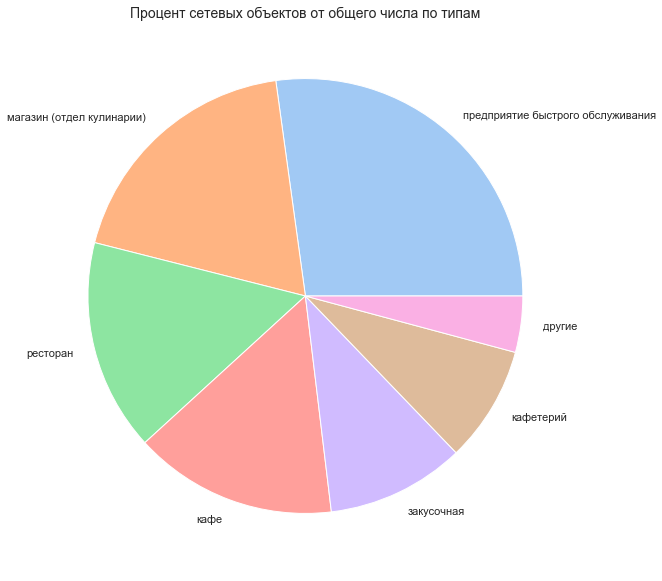

In [18]:
labels = ['предприятие быстрого обслуживания','магазин (отдел кулинарии)','ресторан','кафе','закусочная','кафетерий','другие']
percent = [41.13,28.57,23.81,22.89,15.56,13.07,6.32]
plt.figure(figsize = (10,10))
fig  = sns.set_palette('pastel')
plt.pie(percent, labels=labels)
plt.title('Процент сетевых объектов от общего числа по типам',fontsize=14)
plt.show()

Наибольшее количество сетевых заведений от общего числа у предприятий быстрого питания (41.13%), также более 1/4 магазинов и более 1/5 ресторанов и кафе являются сетевыми.

<a id='2.4'></a>

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Сгруппируем сетевые заведения по сети и рассчитаем среднее количество заведений и посадочных мест для каждой сети.

In [19]:
chain = rest_data.query('chain == "да"').groupby('object_name').agg({'id':'count', 'number':'mean'})\
                 .sort_values(by = 'id',ascending = False).rename(columns = {'id':'rest','number':'mean_number'})
chain.head(20)

,rest,mean_number
object_name,,
шоколадница,157,57.184713
kfc,156,55.923077
макдоналдс,153,87.235294
бургер кинг,144,48.430556
теремок,94,25.606383
домино'с пицца,91,18.186813
крошка картошка,90,21.855556
суши wok,86,6.651163
милти,78,1.230769


In [20]:
a = chain['rest'].max()
b = chain['rest'].min()
c = chain['mean_number'].max()
d = chain['mean_number'].min()
print(f'Количество заведений: максимум {a}, минимум {b}')
f'Количество посадочных мест: максимум {c}, минимум {d}'
 

Количество заведений: максимум 157, минимум 1


'Количество посадочных мест: максимум 306.0, минимум 0.0'

Чтобы выделить границы 'много/мало' заведений и 'много/мало' посадочных мест рассчитаем перцентили.

In [21]:
print(np.percentile(chain['rest'],[50,75]))
np.percentile(chain['mean_number'],[25,50,75])

[1. 3.]


array([20., 45., 85.])

Выберем количество заведений более 4 за границу и количество посадочных мест более 45.

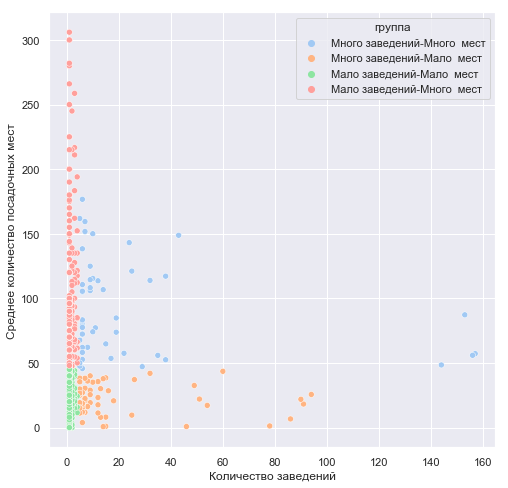

,число сетей,медиана количества заведений,медиана среднего количества посадочных мест
группа,,,
Мало заведений-Мало мест,202,1,20.00
Мало заведений-Много мест,204,1,90.00
Много заведений-Мало мест,57,9,21.00
Много заведений-Много мест,50,9,79.25


In [22]:
chain['rest_group'] = 'Мало заведений'
chain.loc[chain['rest']>4,'rest_group'] = 'Много заведений' 
chain['number_group'] = 'Мало  мест'
chain.loc[chain['mean_number']>45,'number_group'] = 'Много  мест' 
chain['группа'] = chain['rest_group'].astype(str) + '-' + chain['number_group'].astype(str)
sns.scatterplot(data = chain, x = 'rest', y = 'mean_number', hue = 'группа')
fig  = sns.set_palette('CMRmap_r')
plt.xlabel('Количество заведений')
plt.ylabel('Среднее количество посадочных мест')
plt.show()

chain.reset_index().groupby('группа').agg({'object_name':'nunique', 'rest':'median','mean_number':'median'})\
                   .rename(columns = {'object_name':'число сетей',
                                      'rest':'медиана количества заведений ',
                                      'mean_number':'медиана среднего количества посадочных мест'})

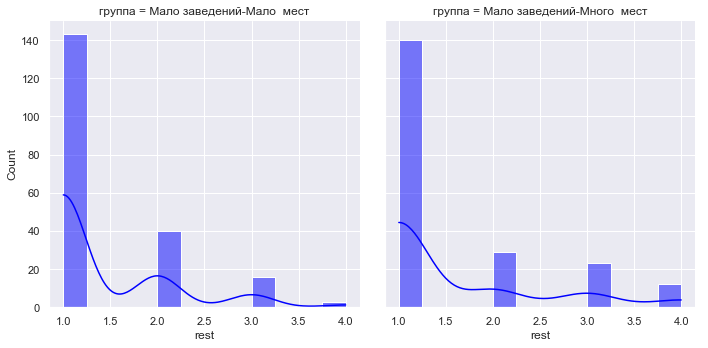

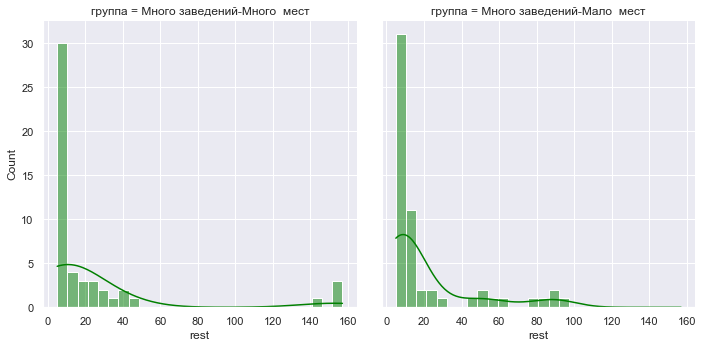

In [23]:
# распределение количества заведений в разных группах
sns.displot(x='rest',
            col='группа',
            kde=True,
            data=chain.query('rest_group == "Мало заведений"'),
            color = 'blue');
sns.displot(x='rest',
            col='группа',
            kde=True,
            data=chain.query('rest_group == "Много заведений"'),
            color = 'green');
plt.show()

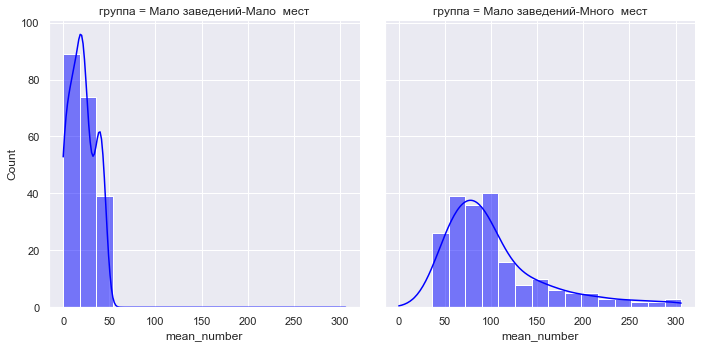

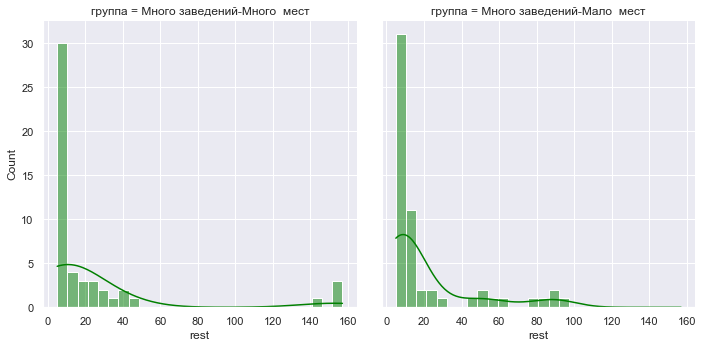

In [24]:
# распределение среднего количества мест в разных группах
sns.displot(x='mean_number',
            col='группа',
            kde=True,
            data=chain.query('rest_group == "Мало заведений"'),
            color = 'blue');
sns.displot(x='rest',
            col='группа',
            kde=True,
            data=chain.query('rest_group == "Много заведений"'),
            color = 'green');
plt.show()

Для сетевых заведений более характерно малое количество заведений (менее 4, медиана 1) с большим количеством посадочных мест(более 45, медиана 90 мест).

<a id='2.5'></a>

### Среднее количество посадочных мест

In [25]:
rest_data.groupby('object_type').agg({'number':'mean'})\
                          .sort_values(by = 'number',ascending = False).rename(columns = {'number':'mean_number'})


,mean_number
object_type,
столовая,130.246618
ресторан,96.834136
буфет,51.129915
бар,43.494159
кафе,39.716019
предприятие быстрого обслуживания,20.552262
кафетерий,9.123116
закусочная,7.608333
магазин (отдел кулинарии),5.589744


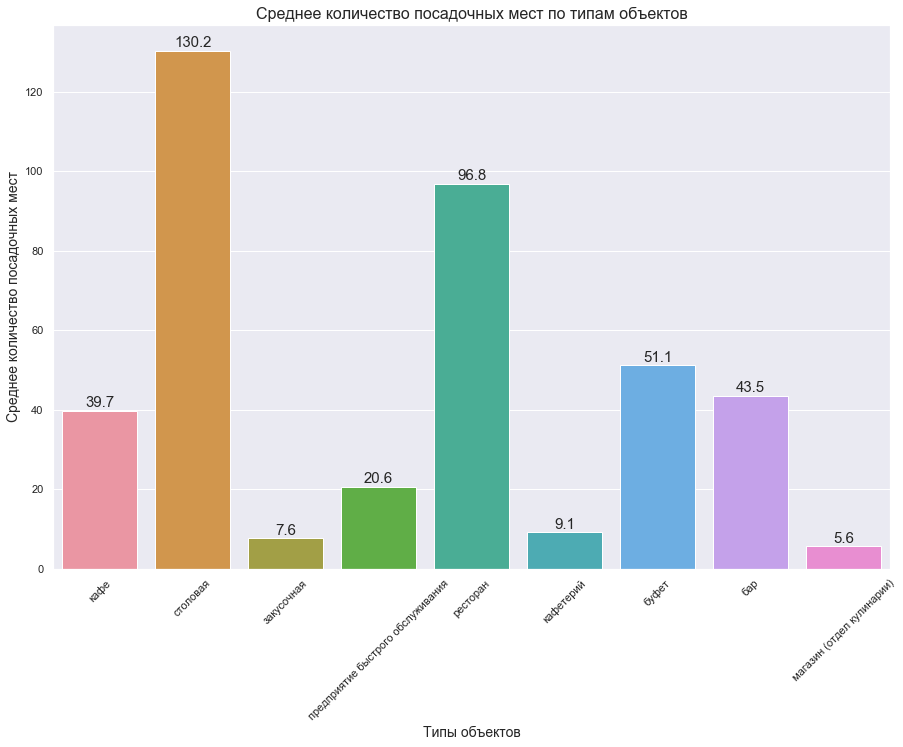

In [26]:
fig = plt.subplots(figsize=(15, 10)) 
plot = sns.barplot(x='object_type', y = 'number', data = rest_data, ci=None)
plt.title('Среднее количество посадочных мест по типам объектов',fontsize=16)
plt.xlabel('Типы объектов',fontsize=14)
plt.ylabel('Среднее количество посадочных мест',fontsize=14)
plt.xticks(rotation = 45)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points');
plt.show()

Наибольшее среднее количество посадочных мест в столовых (130,2), далее следуют рестораны (96,8). Далее следуют буфет, бар и кафе причем их средние значения более чем в 2 раза меньше "лидера", предприятия быстрого обслуживания близки по количеству мест к этой группе объектов, но в силу специфики работы имеют меньшее количество посадочных мест в среднем.

<a id='2.6'></a>

### Топ-10 улиц по количеству объектов общественного питания

In [27]:
rest_data['street'] = rest_data['address'].apply(lambda x: x.split(',')[1])
rest_data['street'] = rest_data['street'].str.strip()
rest_data[['address', 'street']].head()


,address,street
0,"город Москва, улица Егора Абакумова, дом 9",улица Егора Абакумова
1,"город Москва, улица Талалихина, дом 2/1, корпус 1",улица Талалихина
2,"город Москва, Абельмановская улица, дом 6",Абельмановская улица
3,"город Москва, Абрамцевская улица, дом 1",Абрамцевская улица
4,"город Москва, Абрамцевская улица, дом 9, корпус 1",Абрамцевская улица


In [28]:
rest_data.groupby('street').agg({'id':'count'})\
        .sort_values(by = 'id',ascending = False).rename(columns = {'id':'total'}).head(10)

,total
street,
город Зеленоград,232
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167
Варшавское шоссе,161
Ленинский проспект,147
поселение Сосенское,138
проспект Вернадского,132


In [29]:
top_street = rest_data.query('street != "город Зеленоград" and street != "поселение Сосенское"').groupby('street').agg({'id':'count'}).sort_values(by = 'id',ascending = False).rename(columns = {'id':'total'}).head(10)
top_street

,total
street,
проспект Мира,204
Профсоюзная улица,182
Ленинградский проспект,171
Пресненская набережная,167
Варшавское шоссе,161
Ленинский проспект,147
проспект Вернадского,132
Кутузовский проспект,114
Каширское шоссе,112


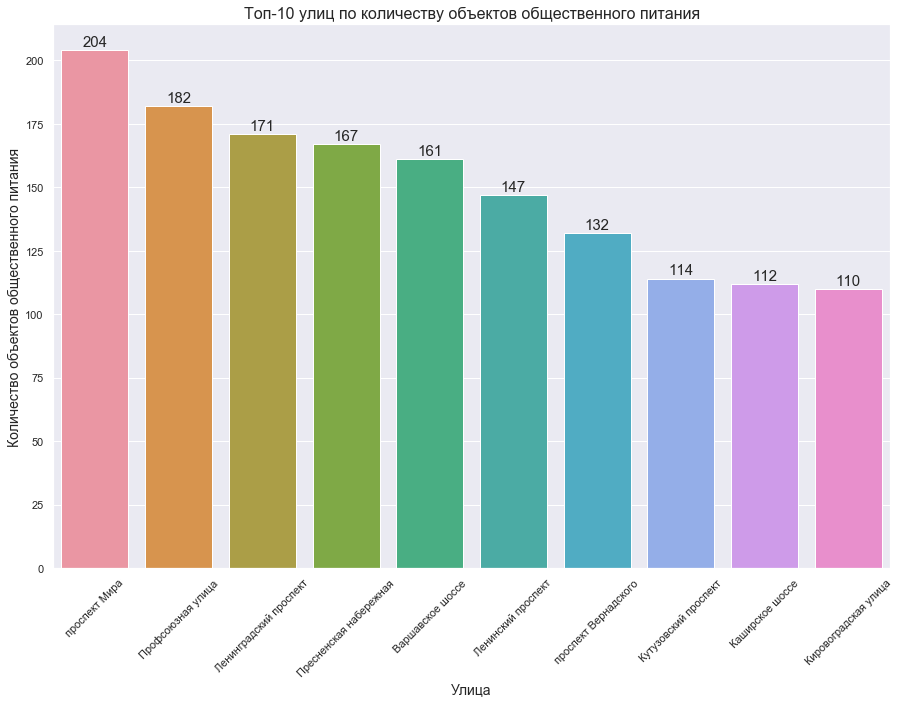

In [30]:
street = ['проспект Мира','Профсоюзная улица','Ленинградский проспект', 'Пресненская набережная','Варшавское шоссе','Ленинский проспект',
'проспект Вернадского','Кутузовский проспект','Каширское шоссе','Кировоградская улица']
fig = plt.subplots(figsize=(15, 10)) 
plot = sns.barplot(x= street, y='total', data = top_street)
plot.axes.set_title("Топ-10 улиц по количеству объектов общественного питания", fontsize=16)
plot.set_xlabel("Улица", fontsize=14)
plot.set_ylabel("Количество объектов общественного питания", fontsize=14)
plt.xticks(rotation = 45)

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points');


Наибольшее количество пердприятий общественного питания на проспекте Мира (204), также в пятерку входят Профсоюзная улица (182), Ленинградский просвект(171), Пресненская набережная(167) и Варшавское шоссе (161). Наименьшее количество заведений общественного питания в топ 10 на Кировоградской улице(110), причем число объетов здесь практически в 2 раза меньше, чем у "лидера".

In [31]:
from io import BytesIO
import requests

spreadsheet_id = '1MpNEZGGcpYru4t9vMD53gUFtxUz2gQq3FrRUubQIWSQ'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [32]:
top_street = top_street.merge(df[['streetname','area']], left_on = 'street', right_on = 'streetname', how = 'left')
top_street

,total,streetname,area
0,204,проспект Мира,Алексеевский район
1,204,проспект Мира,Ярославский Район
2,204,проспект Мира,Район Марьина роща
3,204,проспект Мира,Останкинский район
4,204,проспект Мира,Район Ростокино
5,204,проспект Мира,Район Свиблово
6,204,проспект Мира,Мещанский район
7,182,Профсоюзная улица,Академический район
8,182,Профсоюзная улица,Район Черемушки
9,182,Профсоюзная улица,Район Ясенево


In [33]:
top_street.groupby('area').agg({'streetname':'count'}).sort_values(by = 'streetname', ascending = False)

,streetname
area,
Район Чертаново Центральное,2
Донской район,2
Ломоносовский район,2
Район Проспект Вернадского,2
Обручевский район,2
Район Теплый Стан,2
Район Нагатино-Садовники,2
Район Чертаново Южное,2
Район Тропарево-Никулино,2


Можно выделить 11 районов, гда расположено две улицы с наибольшим количеством заведений общественного питания.
* Район Чертаново Центральное
* Донской район
* Ломоносовский район
* Район Проспект Вернадского
* Обручевский район
* Район Теплый Стан
* Район Нагатино-Садовники
* Район Чертаново Южное
* Район Тропарево-Никулино
* Район Гагаринский
* Район Чертаново Северное

<a id='2.7'></a>

### Число улиц с одним объектом общественного питания

In [34]:
street_with_1 = rest_data.groupby('street').agg({'id':'count'})\
                .sort_values(by = 'id',ascending = True).rename(columns = {'id':'total'}).query('total == 1')
street_with_1

,total
street,
Новопресненский переулок,1
Вяземская улица,1
улица Раевского,1
Таёжная улица,1
Газгольдерная улица,1
Тарханская улица,1
Тарусская улица,1
Гаражная улица,1
Театральная аллея,1


In [35]:
street_with_1 = street_with_1.merge(df[['streetname','area']], left_on = 'street', right_on = 'streetname', how = 'left')
street_with_1

,total,streetname,area
0,1,Новопресненский переулок,Пресненский район
1,1,Вяземская улица,Можайский Район
2,1,улица Раевского,Район Дорогомилово
3,1,Таёжная улица,Лосиноостровский район
4,1,Газгольдерная улица,Нижегородский район
5,1,Тарханская улица,Район Выхино-Жулебино
6,1,Тарусская улица,Район Ясенево
7,1,Гаражная улица,Район Соколиная Гора
8,1,Театральная аллея,Район Аэропорт
9,1,Гвардейская улица,Можайский Район


In [36]:
street_with_1.groupby('area').agg({'streetname':'count'}).sort_values(by = 'streetname', ascending = False).head(10)

,streetname
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,19
Район Марьина роща,18
Район Арбат,17
Мещанский район,16
Район Сокольники,15


Наибольшее количество улиц, где расположен 1 объект общественного питания относится к Таганскому району(27), району Хамовники(26) и Басманному району(25).

<a id='2.8'></a>

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [37]:
top_1 = ['проспект Мира','Профсоюзная улица','Ленинградский проспект']
top_2 = ['Пресненская набережная','Варшавское шоссе','Ленинский проспект']
top_3 = ['проспект Вернадского','Кутузовский проспект']
top_4 = ['Каширское шоссе','Кировоградская улица']

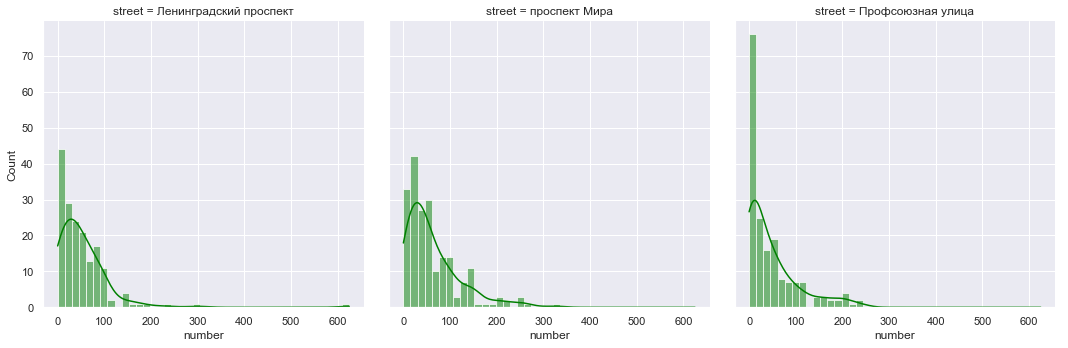

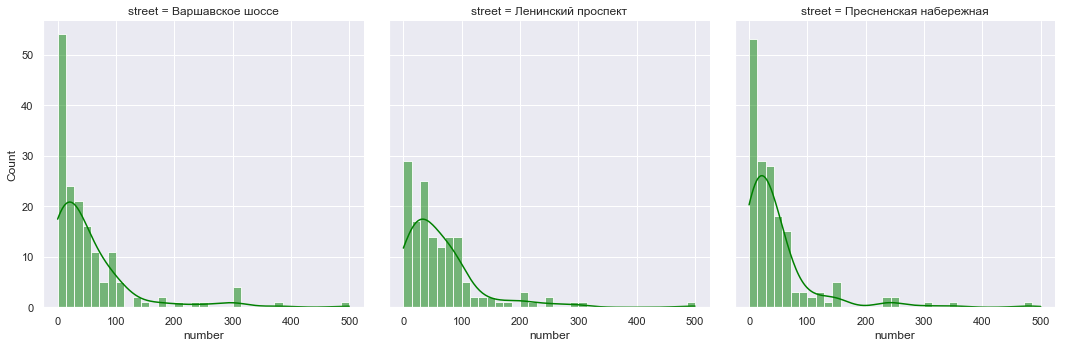

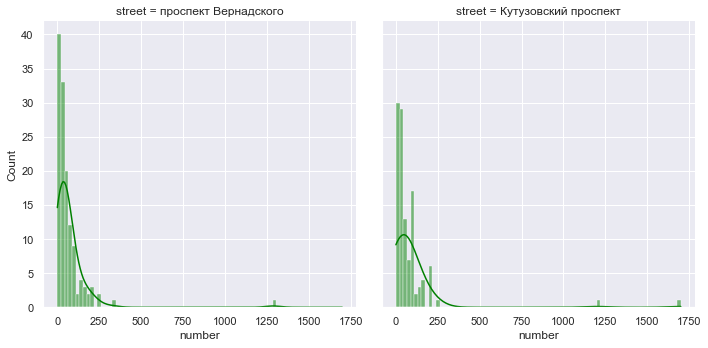

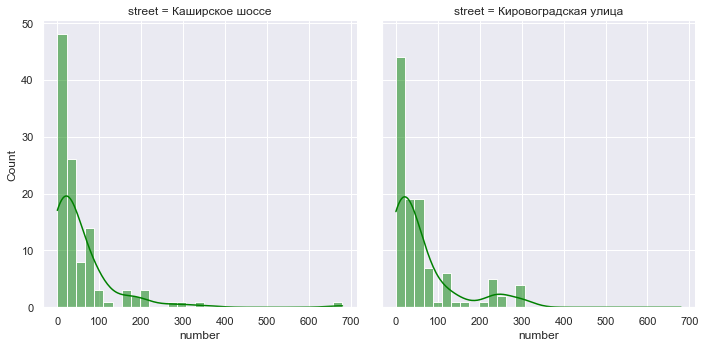

In [38]:
sns.displot(x='number',
            col='street',
            kde=True,
            data=rest_data.query('street in @top_1'),
            color = 'green');
sns.displot(x='number',
            col='street',
            kde=True,
            data=rest_data.query('street in @top_2'),
            color = 'green');
sns.displot(x='number',
            col='street',
            kde=True,
            data=rest_data.query('street in @top_3'),
            color = 'green');
sns.displot(x='number',
            col='street',
            kde=True,
            data=rest_data.query('street in @top_4'),
            color = 'green');
plt.show()   

In [39]:
top_10 = ['проспект Мира','Профсоюзная улица','Ленинградский проспект','Пресненская набережная','Варшавское шоссе','Ленинский проспект',
          'проспект Вернадского','Кутузовский проспект','Каширское шоссе','Кировоградская улица']
rest_data.query('street in @top_10').groupby('street').agg({'number':'median'})\
          .sort_values(by = 'number',ascending = False).rename(columns = {'number':'median_number'})

,median_number
street,
проспект Мира,46.5
Ленинский проспект,45.0
Кутузовский проспект,40.0
Ленинградский проспект,40.0
проспект Вернадского,40.0
Варшавское шоссе,30.0
Кировоградская улица,30.0
Пресненская набережная,30.0
Каширское шоссе,25.0


Для всех улиц с большим количеством объектов общественного питания, характерно схожее распределение посадочных мест в этих объектах. Распеределение смещено в сторону меньших значений, имеет вид схожий с Пуассоновским распределеним, за счет преобладания в выборках объектов без посадочных мест(0). Медианы от 24 до 46,5 мест, в среднем 35 мест.

<a id='3'></a>

## Вывод

1. Состояние рынка

Среди типов сетевых и несетевых объектов общественного питанию преобладают кафе. Среди сетевых много ресторанов и предприятий быстрого обслуживания, а среди несетевых - ресторанов и столовых.

Большая часть предприятий общественного питания (более 80%) несетевые.

Наибольшее количество сетевых заведений от общего числа у предприятий быстрого питания (41.13%), также более 1/4 магазинов и более 1/5 ресторанов и кафе являются сетевыми.

Для сетевых заведений более характерно малое количество заведений (менее 4, медиана 1) с большим количеством посадочных мест(более 45 мест, медиана 90 мест)
Наибольшее среднее количество посадочных мест в столовых (130,2), далее следуют рестораны (96,8). 

Наибольшее количество пердприятий общественного питания 
* на проспекте Мира (204), также в пятерку входят 
* Профсоюзная улица (182), 
* Ленинградский просвект(171), 
* Пресненская набережная(167) 
* Варшавское шоссе (161). 

Можно выделить 11 районов, гда расположено две улицы с наибольшим количеством заведений общественного питания.

* Район Чертаново Центральное
* Донской район
* Ломоносовский район
* Район Проспект Вернадского
* Обручевский район
* Район Теплый Стан
* Район Нагатино-Садовники
* Район Чертаново Южное
* Район Тропарево-Никулино
* Район Гагаринский
* Район Чертаново Северное

Наибольшее количество улиц, где расположен 1 объект общественного питания относится 
* к Таганскому району(27)
* району Хамовники(26) 
* Басманному району(25)

Для всех улиц с большим количеством объектов общественного питания, характерно схожее распределение посадочных мест в этих объектах, оно смещено в сторону меньших значений, за счет преобладания в выборках объектов без посадочных мест(0).

2. Рекомендации
* вид заведения - кафе
* район расположения - целесообразнее выбрать одну из улиц с большим количеством заведений общественного питания, желательно ближе к туристическим маршрутам города, для обеспечения большой проходимости людей, так как заведение будет отличаться оригинальностью на фоне других, "эффект новизны" будет поддерживаться большими проходящими потоками людей
* учитывая расположение на улице с большим количеством заведений общественного питания оптимальное количество посадочных мест 35-40.
* как вариант развития можно рассмотреть открытие еще одного филиала на одной из улиц с большой проходимостью также на 35-40 мест. Либо выбрать один из районов с небольшим количеством заведений питания, где меньше конкуренция и открыть заведение вблизи университета или центров внешкольной работы, так как основной контингент, для которого характерна приверженность техническим новинкам подростки и молодежь.

<a id='4'></a>

Презентация: <https://disk.yandex.ru/i/zhayScKRB3oI7w> 